In [1]:
import matplotlib.pyplot as plt
import numpy as np
# calculate 1. Average response time 2. QPS 3. TPS 4. success rate

In [2]:
def read_stm3(filename):
    writeN = []
    readN = []
    times = []
    opsN = []
    with open(filename) as f:
        for l in f:
            fields = l.strip().split(',')
            if len(fields) == 0:
                continue
            if fields[0] == "head":
                writeN.append(int(fields[2]) * 2)
                readN.append(int(fields[3]))
            elif fields[0] == "hybrid":
                times.append(int(fields[1]))
                opsN.append(int(fields[2]))
    writeN = np.array(writeN)
    readN = np.array(readN)
    times = np.array(times)
    opsN = np.array(opsN)
    return writeN, readN, times, opsN

def read_stm4(filename):
    writeN = []
    readN = []
    times = []
    opsN = []
    successN = []
    failN = []
    with open(filename) as f:
        for l in f:
            fields = l.strip().split(',')
            if len(fields) == 0:
                continue
            if fields[0] == "head":
                writeN.append(int(fields[2]) * 2)
                readN.append(int(fields[3]))
            elif fields[0] == "hybrid":
                times.append(int(fields[1]))
                opsN.append(int(fields[2]))
                successN.append(int(fields[3]))
                failN.append(int(fields[4]))
    writeN = np.array(writeN)
    readN = np.array(readN)
    times = np.array(times)
    opsN = np.array(opsN)
    successN = np.array(successN)
    failN = np.array(failN)
    return writeN, readN, times, opsN, successN, failN

In [3]:
baseWriteN, baseReadN, baseTimes, baseOpsN = read_stm3('./base_stm3.log')
mvccWriteN, mvccReadN, mvccTimes, mvccOpsN = read_stm3('./mvcc_stm3.log')

In [13]:
threadN = baseWriteN + baseReadN
writePerc = baseWriteN / threadN
uwPerc = np.unique(writePerc)
for p in uwPerc:
    b = writePerc==p
    tn = threadN[b]
    print('{:.4f}: {} {} {}'.format(p, len(tn), np.max(tn), np.min(tn)))

0.0588: 1 34 34
0.0606: 1 33 33
0.0625: 1 32 32
0.0645: 1 31 31
0.0667: 1 30 30
0.0690: 1 29 29
0.0714: 1 28 28
0.0741: 1 27 27
0.0769: 1 26 26
0.0800: 1 25 25
0.0833: 1 24 24
0.0870: 1 23 23
0.0909: 1 22 22
0.0952: 1 21 21
0.1000: 1 20 20
0.1053: 1 19 19
0.1111: 2 36 18
0.1143: 1 35 35
0.1176: 2 34 17
0.1212: 1 33 33
0.1250: 2 32 16
0.1290: 1 31 31
0.1333: 2 30 15
0.1379: 1 29 29
0.1429: 2 28 14
0.1481: 1 27 27
0.1538: 2 26 13
0.1579: 1 38 38
0.1600: 1 25 25
0.1622: 1 37 37
0.1667: 3 36 12
0.1714: 1 35 35
0.1739: 1 23 23
0.1765: 1 34 34
0.1818: 3 33 11
0.1875: 1 32 32
0.1905: 1 21 21
0.1935: 1 31 31
0.2000: 4 40 10
0.2051: 1 39 39
0.2069: 1 29 29
0.2105: 2 38 19
0.2143: 1 28 28
0.2162: 1 37 37
0.2222: 4 36 9
0.2286: 1 35 35
0.2308: 1 26 26
0.2353: 2 34 17
0.2400: 1 25 25
0.2424: 1 33 33
0.2500: 4 32 8
0.2581: 1 31 31
0.2609: 1 23 23
0.2667: 2 30 15
0.2727: 1 22 22
0.2759: 1 29 29
0.2857: 4 28 7
0.2963: 1 27 27
0.3000: 1 20 20
0.3077: 2 26 13
0.3158: 1 19 19
0.3200: 1 25 25
0.3333: 4 2

In [27]:
def picture_range(threadNums, writePerc, yValues, rMin, rMax, label=None):
    b = (writePerc >= rMin) & (writePerc < rMax)
    threadNums = threadNums[b]
    threadNums, uIdx = np.unique(threadNums, return_index=True)
    yValues = yValues[b][uIdx]
    plt.plot(threadNums, yValues, label = label)

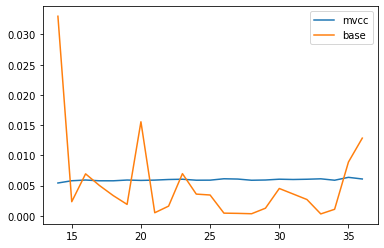

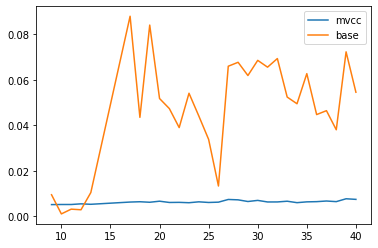

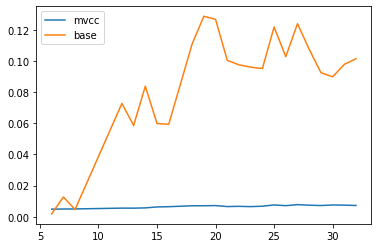

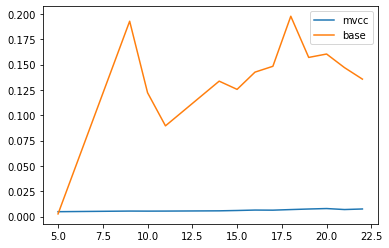

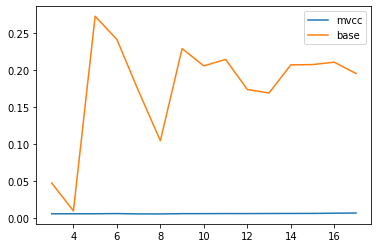

In [29]:
# average response time
ranges = [0, 0.15, 0.25, 0.35, 0.45, 1]
baseAvgResp = baseTimes / baseOpsN
mvccAvgResp = mvccTimes / mvccOpsN
for i in range(len(ranges) - 1):
    plt.figure()
    picture_range(threadN, writePerc, mvccTimes/mvccOpsN, ranges[i], ranges[i+1], "mvcc")
    picture_range(threadN, writePerc, baseTimes/baseOpsN, ranges[i], ranges[i+1], "base")
    plt.legend()

In [30]:
# QPS, TPS, success rate
baseWriteN, baseReadN, baseTimes, baseOpsN, baseSuccessN, baseFailN = read_stm4('./base.log')
mvccWriteN, mvccReadN, mvccTimes, mvccOpsN, mvccSuccessN, mvccFailN = read_stm4('./mvcc.log')

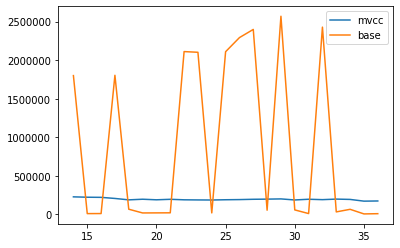

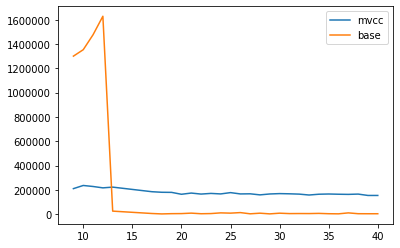

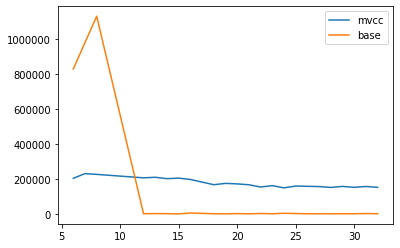

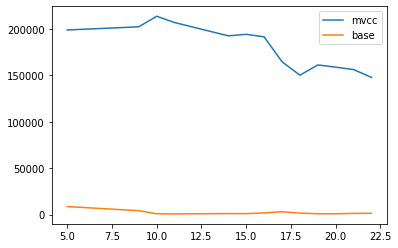

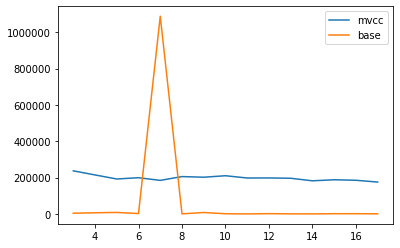

In [34]:
baseTPS = 1000/ (baseTimes / baseSuccessN)
mvccTPS = 1000/ (mvccTimes / mvccSuccessN)
for i in range(len(ranges) - 1):
    plt.figure()
    picture_range(threadN, writePerc, mvccTPS, ranges[i], ranges[i+1], "mvcc")
    picture_range(threadN, writePerc, baseTPS, ranges[i], ranges[i+1], "base")
    plt.legend()

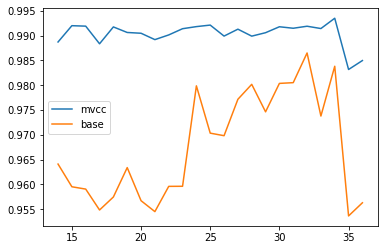

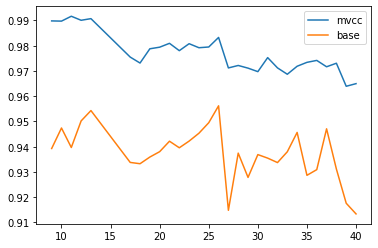

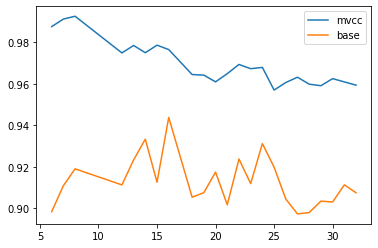

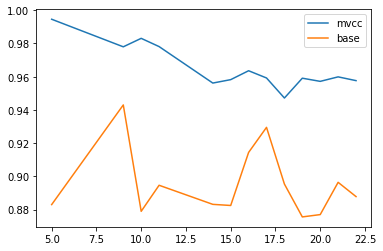

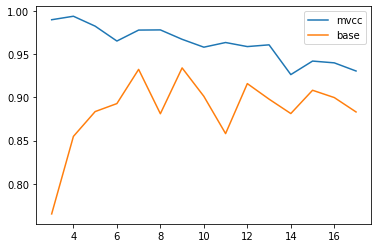

In [37]:
baseR =  baseSuccessN / baseOpsN
mvccR =  mvccSuccessN / mvccOpsN
for i in range(len(ranges) - 1):
    plt.figure()
    picture_range(threadN, writePerc, mvccR, ranges[i], ranges[i+1], "mvcc")
    picture_range(threadN, writePerc, baseR, ranges[i], ranges[i+1], "base")
    plt.legend()